In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Loading the data

In [2]:
data=pd.read_excel("default.xls")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Understanding the data and understanding the data about it. 


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
for i in ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]:
    print("\n",data[i].describe())


 count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

 count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64

 count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64

 count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64

 count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500

In [7]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [8]:
## where 1 represents MALE
## where 2 represents FEMALE

In [9]:
data['MARRIAGE'].value_counts()
# 1=married, 2=single, 3=other

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [10]:
data['EDUCATION'].value_counts()
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [11]:
data['EDUCATION']=data[data['EDUCATION']==5 or data['EDUCATION']==6]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
data[data['EDUCATION']==0]

In [ ]:
data[data['MARRIAGE']==0]

In [ ]:
data.isna().sum()

In [12]:
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [13]:
for col_name in data.columns:
  num = data[col_name].nunique()
  percentage = num / data.shape[0] *100
  print('%s, %d, %.2f%%' % (col_name, num, percentage))

ID, 30000, 100.00%
LIMIT_BAL, 81, 0.27%
SEX, 2, 0.01%
EDUCATION, 7, 0.02%
MARRIAGE, 4, 0.01%
AGE, 56, 0.19%
PAY_0, 11, 0.04%
PAY_2, 11, 0.04%
PAY_3, 11, 0.04%
PAY_4, 11, 0.04%
PAY_5, 10, 0.03%
PAY_6, 10, 0.03%
BILL_AMT1, 22723, 75.74%
BILL_AMT2, 22346, 74.49%
BILL_AMT3, 22026, 73.42%
BILL_AMT4, 21548, 71.83%
BILL_AMT5, 21010, 70.03%
BILL_AMT6, 20604, 68.68%
PAY_AMT1, 7943, 26.48%
PAY_AMT2, 7899, 26.33%
PAY_AMT3, 7518, 25.06%
PAY_AMT4, 6937, 23.12%
PAY_AMT5, 6897, 22.99%
PAY_AMT6, 6939, 23.13%
default payment next month, 2, 0.01%


In [14]:
duplicate=data.duplicated()
print(duplicate.any())
print(data[duplicate])

False
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month]
Index: []

[0 rows x 25 columns]


In [15]:
data['default payment next month'].value_counts()
#

0    23364
1     6636
Name: default payment next month, dtype: int64

# EDA

In [16]:
client_info=list(data.columns[1:6])
client_data=data[client_info]
client_data
payment_data=data[data.columns[6:12]]
bill_amt=data[data.columns[12:18]]
pay_amt=data[data.columns[18:24]]

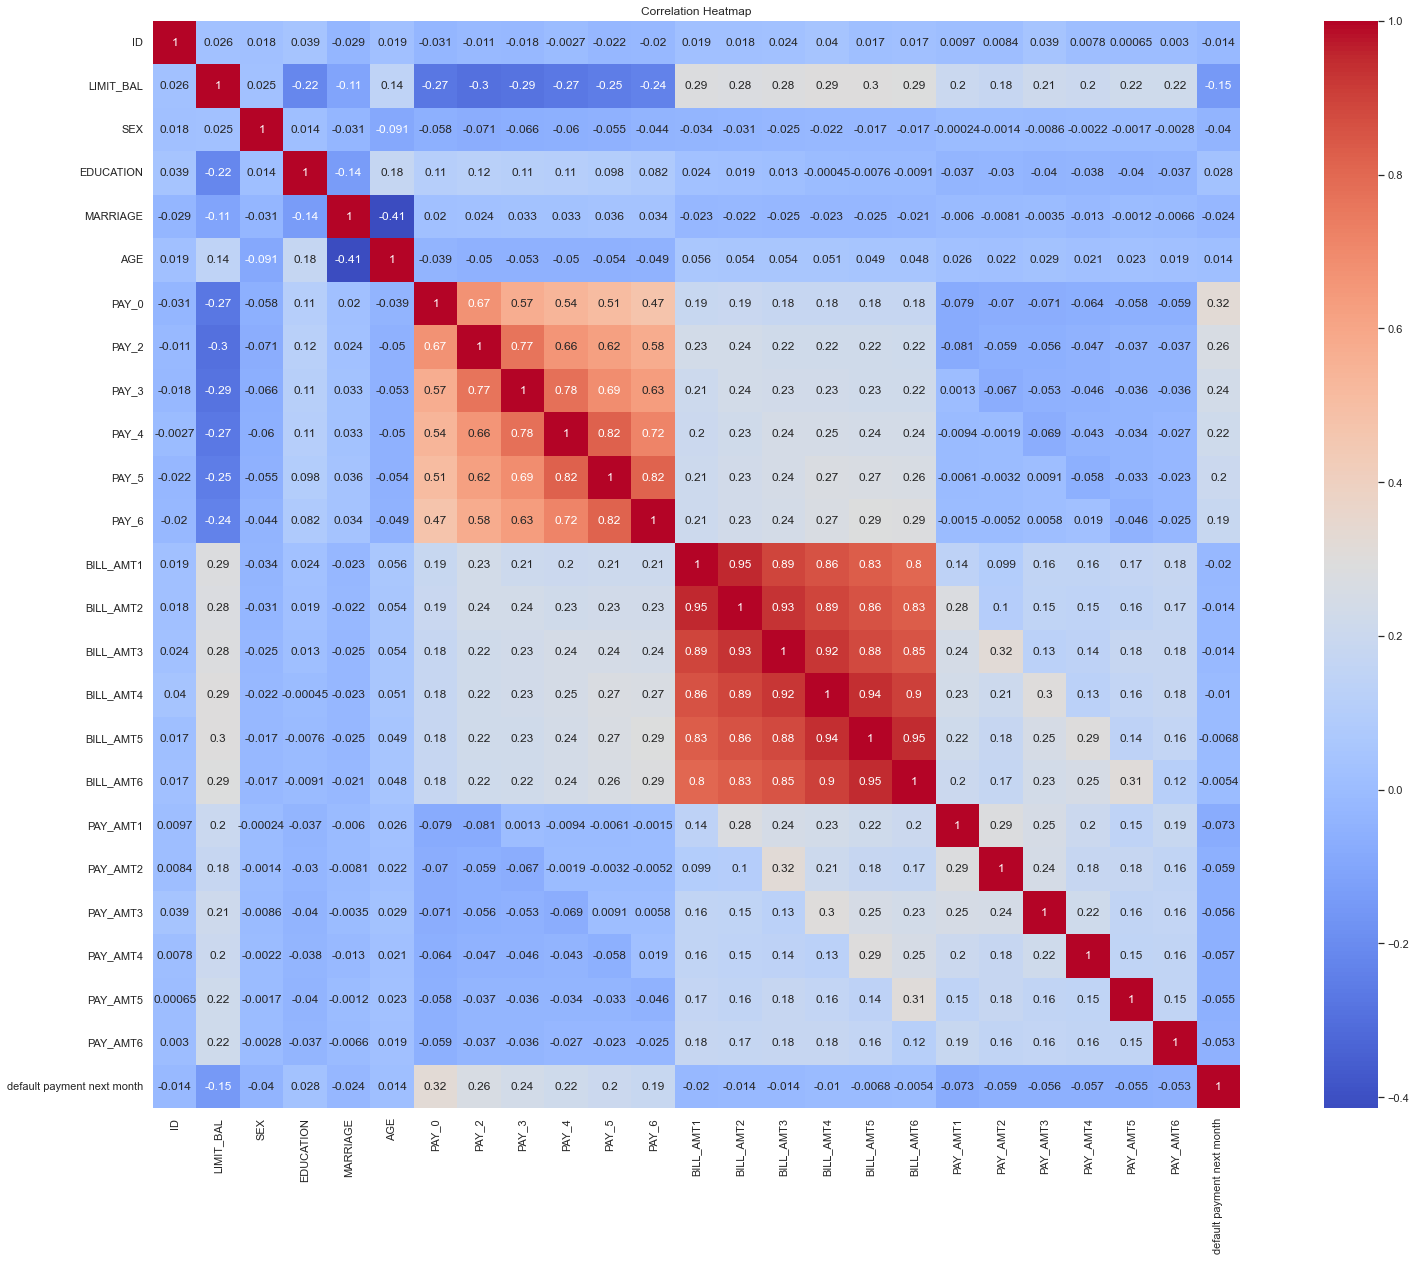

In [17]:
corr = np.corrcoef(data, rowvar=False)
plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, xticklabels=data.columns, yticklabels=data.columns)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
print('default payment Yes:',len(data[data['default payment next month']==1]))
print('default payment No:',len(data[data['default payment next month']==0]))

default payment Yes: 6636
default payment No: 23364


In [19]:
#sns.pairplot(client_data)
upper_tri = np.triu(corr, k=1) # Extract upper triangle of the correlation matrix
correlation_pairs = np.argwhere(upper_tri >0 ) # Find indices of positive correlation pairs
sorted_pairs = sorted(correlation_pairs, key=lambda x: corr[x[0], x[1]], reverse=True) # Sort by correlation value
top_pairs = sorted_pairs[:10] # Select top 30 pairs

# Retrieve column names from dataframe
columns = data.columns
# Print out the top 30 positive correlation pairs of features with column names
print("Top 10 Positive Correlation Pairs of Features:")
for pair in top_pairs:
    feature1 = columns[pair[0]] # Retrieve column name for feature1
    feature2 = columns[pair[1]] # Retrieve column name for feature2
    correlation = corr[pair[0], pair[1]] # Retrieve correlation value
    print(f"Feature '{feature1}' and Feature '{feature2}': Correlation = {correlation:.3f}")

Top 10 Positive Correlation Pairs of Features:
Feature 'BILL_AMT1' and Feature 'BILL_AMT2': Correlation = 0.951
Feature 'BILL_AMT5' and Feature 'BILL_AMT6': Correlation = 0.946
Feature 'BILL_AMT4' and Feature 'BILL_AMT5': Correlation = 0.940
Feature 'BILL_AMT2' and Feature 'BILL_AMT3': Correlation = 0.928
Feature 'BILL_AMT3' and Feature 'BILL_AMT4': Correlation = 0.924
Feature 'BILL_AMT4' and Feature 'BILL_AMT6': Correlation = 0.901
Feature 'BILL_AMT2' and Feature 'BILL_AMT4': Correlation = 0.892
Feature 'BILL_AMT1' and Feature 'BILL_AMT3': Correlation = 0.892
Feature 'BILL_AMT3' and Feature 'BILL_AMT5': Correlation = 0.884
Feature 'BILL_AMT1' and Feature 'BILL_AMT4': Correlation = 0.860


In [20]:
## the bill amt columns and so do pay columnsexhibit some serious correlation amongst themselves,
## which in turn will cause multi collinearity

In [21]:
bill_amt=pd.concat([bill_amt,target],axis=1)
pay_amt=pd.concat([pay_amt,target],axis=1)


NameError: name 'target' is not defined

In [22]:
pay_subset = data[data.columns[6:12]]

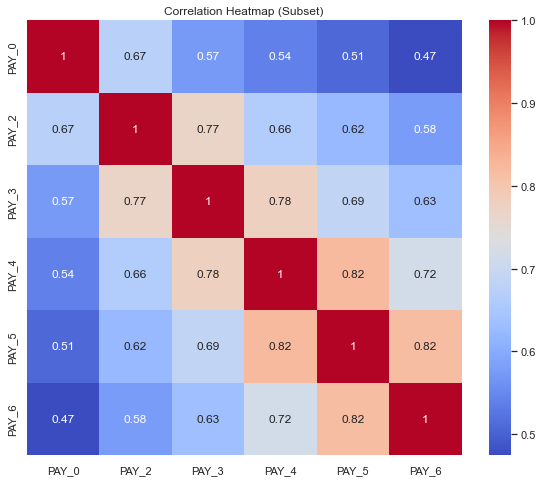

In [23]:
corr_subset = pay_subset.corr()

# Convert correlation matrix to 2-dimensional numpy array
corr_array = np.array(corr_subset)

# Create a heatmap of the correlation matrix for the subset of variables
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_array, annot=True, cmap="coolwarm", square=True, xticklabels=pay_subset.columns, yticklabels=pay_subset.columns)
plt.title("Correlation Heatmap (Subset)")
plt.show()


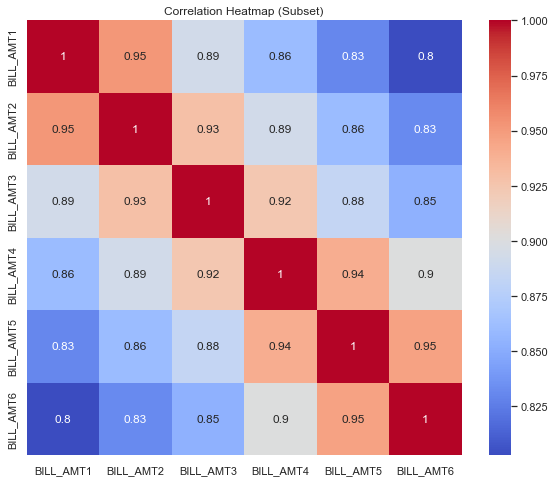

In [24]:
bill_amt_subset = data[data.columns[12:18]]

# Compute correlation matrix for the subset of variables
corr_subset = bill_amt_subset.corr()

# Convert correlation matrix to 2-dimensional numpy array
corr_array = np.array(corr_subset)

# Create a heatmap of the correlation matrix for the subset of variables
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_array, annot=True, cmap="coolwarm", square=True, xticklabels=bill_amt_subset.columns, yticklabels=bill_amt_subset.columns)
plt.title("Correlation Heatmap (Subset)")
plt.show()



In [25]:
data1=data.rename(columns = {'PAY_0':'PAY_1'})

##data1.drop(['ID'], axis =1) APPLIED

In [26]:
## Anova lagao
## fir train test data pe go for a z test

In [27]:
data1['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [28]:
data1['EDUCATION'] = np.where(data1['EDUCATION'].isin([ 5,6, 0]), 4, data1['EDUCATION'])
data1['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION'>

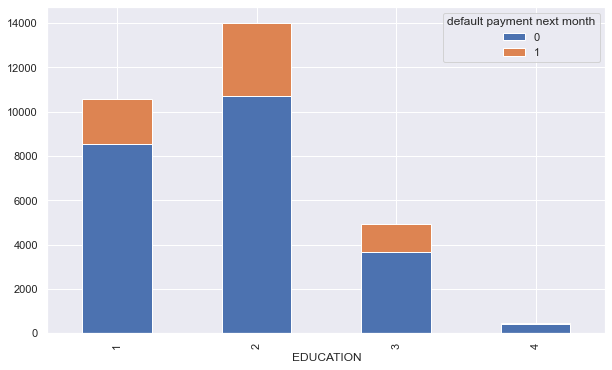

In [29]:


grouped_data = data1.groupby(['EDUCATION', 'default payment next month']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

In [30]:
data1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [31]:
data1.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [32]:
data1['MARRIAGE'] = np.where(data1['MARRIAGE'].isin([0]), 3, data1['MARRIAGE'])
data1.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [33]:
data1['SEX'] = np.where(data1['SEX']==2, 0, data1['SEX'])
data1['SEX'].value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

In [34]:
y1 = data1['default payment next month']
X1 = data1.drop(['default payment next month'],axis =1)

In [35]:
#Modeling

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [38]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_test)

C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [42]:
lr=LogisticRegression()


In [43]:
lr=lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print('precision', {precision_score(y_test, y_pred)})


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



NameError: name 'precision_score' is not defined

In [44]:
lr=lr.fit(x1_train,y1_train)
y1_pred = lr.predict(x1_test)
print(classification_report(y1_test, y1_pred))
print('precision', {precision_score(y1_test, y1_pred)})


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-

NameError: name 'precision_score' is not defined

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,y_pred)

array([[4550,  137],
       [1004,  309]], dtype=int64)

In [47]:
for i in range(2,10):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print('For n_neighbour value: ',i)
    print(classification_report(y_test, y_pred))

NameError: name 'KNeighborsClassifier' is not defined

In [48]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('precision', {precision_score(y_test, y_pred)})


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.40      1313

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



NameError: name 'precision_score' is not defined

In [49]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x1_train, y1_train)
y1_pred = dt_model.predict(x1_test)
print(classification_report(y1_test, y1_pred))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      4687
           1       0.40      0.42      0.41      1313

    accuracy                           0.73      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.74      0.73      0.74      6000



In [50]:
## We note a neglible difference in the reports as we know, that scaling doesn't show a significant difference.

In [51]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train , y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [52]:
from sklearn.metrics import precision_score

In [53]:
rf_model = rf_model.fit(x1_train , y1_train)
y1_pred = rf_model.predict(x1_test)
print(classification_report(y1_test, y1_pred))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



In [54]:
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X1.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)
print('precision', {precision_score(y1_test, y1_pred)})


      Feature  Importance
6       PAY_1    0.089480
0          ID    0.072331
5         AGE    0.056800
12  BILL_AMT1    0.054294
1   LIMIT_BAL    0.052026
13  BILL_AMT2    0.049590
14  BILL_AMT3    0.048066
7       PAY_2    0.047856
18   PAY_AMT1    0.047528
15  BILL_AMT4    0.047206
17  BILL_AMT6    0.046685
16  BILL_AMT5    0.046113
19   PAY_AMT2    0.043911
20   PAY_AMT3    0.042550
23   PAY_AMT6    0.042510
22   PAY_AMT5    0.040903
21   PAY_AMT4    0.040297
8       PAY_3    0.027166
9       PAY_4    0.025130
10      PAY_5    0.020290
11      PAY_6    0.018116
3   EDUCATION    0.018089
4    MARRIAGE    0.012337
2         SEX    0.010726
precision {0.6420765027322405}


In [55]:
##So, in a way we note that we have better results post scaling. Therefore, let us now apply lazy predict for most variables and check the best performing models.

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
lcz = LazyClassifier(predictions=True)
models = lcz.fit(X_train, X_test, y_train, y_test)
print(models)

In [154]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
x=data.drop()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
logreg = LogisticRegression(penalty='l2', solver='newton-cg', random_state=42)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Check the coefficients to see which features were selected
selected_features = [feature for feature, coef in zip(X.columns, logreg.coef_[0]) if coef != 0]

print("Selected Features:", selected_features)

# Evaluate the model's performance
y_pred = logreg.predict(X_test)
# Add evaluation metrics here (e.g., accuracy, precision, recall, etc.)

NameError: name 'X' is not defined

In [ ]:
## let us now try our luck with the wrapper method then apply models

In [57]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
scoresSFS = []

#iterate SFS transformation for every combination of columns to plot the scores for every feature combination
for i in range(0, len(X.columns)):
    # call SFS Forward method - on Linear regression

    sfs = SequentialFeatureSelector(estimator=lr, k_features=i+1, scoring='precision', verbose=2, forward=True, n_jobs=-1)
    
    sfs.fit(X, y)

    scoresSFS.append(sfs.k_score_)

# Plot scores 

#for Sequential Forward Selection(SFS)
plt.figure(figsize=(25, 10))
plt.plot([i for i in range(0, len(X.columns))], scoresSFS)
plt.title('SFS Scores')
plt.xlabel('Number of Attributes')
plt.ylabel('Score')
pyplot.xticks(rotation=45)
plt.show()


In [ ]:
sfs = SequentialFeatureSelector(lr,
                                k_features=19,  # Number of features to select
                                forward=True,  # Forward selection
                                floating=False,  # Do not allow floating features
                                scoring='precision',  # Evaluation metric
                                cv=5)

In [ ]:
sfs.fit(X_train, y_train)

In [ ]:
selected_feature_names = sfs.k_feature_names_
selected_feature_names

In [ ]:
## hence, now we will make modifications to our X accordingly

In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [59]:
X=data1.drop(['SEX','PAY_2','PAY_3','BILL_AMT3','BILL_AMT4','PAY_AMT6','default payment next month'],axis=1)
y=data1['default payment next month']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42, test_size=0.2)

In [61]:
##NOW LET US TRY MODELLING AGAIN ON CLASSIFIERS USING LAZY PREDICT

In [62]:
lcz = LazyClassifier(predictions=True)
models = lcz.fit(x_train, x_test, y_train, y_test)
print(models)

NameError: name 'LazyClassifier' is not defined

In [63]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(x_train , y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [66]:
precision=precision_score(y_test,y_pred)
precision
## We see an increase in precision post updating the metrics.

0.657496561210454

In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
xgb = XGBClassifier(objective='binary:logistic')

# Train the XGBoost classifier on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, you can print a classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('precision',precision_score(y_test,y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.38      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

[[4414  273]
 [ 820  493]]
precision 0.643603133159269


n_estimators=100,             # Number of boosting rounds (trees)
    max_depth=3,                  # Maximum tree depth
    learning_rate=0.1,            # Step size shrinkage to prevent overfitting
    random_state=42 

In [151]:
from sklearn.ensemble import AdaBoostClassifier

In [152]:
adc = AdaBoostClassifier(
    base_estimator=lr,  # You can specify a base estimator (e.g., DecisionTreeClassifier
)

In [153]:
adc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = adc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('precision',precision_score(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [24000, 32709]

In [72]:
## We note that models  of them have had a significant amount of 

In [73]:
## Now, since the target column is unbalanced, hence we will use smote for it.

In [74]:
pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from imblearn.over_sampling import SMOTE

In [95]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)
x_smote, y_smote = smote.fit_resample(X,y)

X1_train, X1_test, y1_train, y1_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [117]:
rf_model.fit(X1_train, y1_train)


RandomForestClassifier()

In [119]:
y1_pred = rf_model.predict(X1_test)
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))
print('precision',precision_score(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      4664
           1       0.86      0.81      0.83      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346

[[4035  629]
 [ 883 3799]]
precision 0.8579494128274616


In [120]:
from sklearn.metrics import recall_score, f1_score

In [121]:
recall = recall_score(y_test, y_pred)
recall

0.4438266324493869

In [122]:
xgb.fit(X1_train, y1_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [123]:
xgb_pred = xgb.predict(X1_test)
print(classification_report(y1_test, xgb_pred))
print(confusion_matrix(y1_test, xgb_pred))
print('precision',precision_score(y1_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4664
           1       0.84      0.80      0.82      4682

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346

[[3939  725]
 [ 957 3725]]
precision 0.8370786516853933


In [126]:
recall1 = recall_score(y1_test, xgb_pred)
recall1

0.7956001708671507

In [125]:
## Now  let us try doing the scores better using gridsearchcv

In [102]:
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV

In [128]:
param_grid = {
    'n_estimators': [280, 300],           
    'max_depth': [ 25, 30],          # Maximum depth of each tree
    'min_samples_split': [3,4],         # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 3]    }      # Minimum number of samples required at each leaf node  

In [129]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X1_train, y1_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [25, 30], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 4],
                         'n_estimators': [280, 300]},
             verbose=2)

In [130]:
best_params = grid_search.best_params_
best_params

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 280}

In [131]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fit the Randomized Search to your training data
random_search.fit(X1_train, y1_train)

# Get the best hyperparameters
best_params = random_search.best_params_

C:\Users\Divyansh Keshari\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [133]:
best_params 

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [137]:
rf = RandomForestClassifier(random_state=42, max_depth= 30,min_samples_leaf= 2,min_samples_split= 4,n_estimators= 300)

In [138]:
rf.fit(X1_train,y1_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=300, random_state=42)

In [139]:
y1_pred = rf.predict(X1_test)
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))
print('precision',precision_score(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      4664
           1       0.86      0.80      0.83      4682

    accuracy                           0.83      9346
   macro avg       0.84      0.83      0.83      9346
weighted avg       0.84      0.83      0.83      9346

[[4032  632]
 [ 920 3762]]
precision 0.8561675011379153


In [140]:
recall12 = recall_score(y1_test, y1_pred)
recall12

0.8035027765912004

In [143]:
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Perform the grid search
grid_search.fit(X1_train, y1_train)



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [144]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the XGBoost classifier with the best hyperparameters
best_xgb_classifier = XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_xgb_classifier.score(X_test, y_test)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy with Best Model: {accuracy:.2f}")



Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.8}
Test Accuracy with Best Model: 0.82


In [150]:
print('precision',precision_score(y1_test,y2pred))

precision 0.8360099524994345


In [147]:
y2pred=best_xgb_classifier.predict(X1_test)
recall12 = recall_score(y1_test, y2pred)
recall12

0.7894062366510038

In [149]:
print(classification_report(y1_test, y2pred))
print(confusion_matrix(y1_test, y2pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4664
           1       0.84      0.79      0.81      4682

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346

[[3939  725]
 [ 986 3696]]


In [ ]:
## Hence, we notice how Random Forest classifier happens to be the best model practice after applying smote
## It saw a significant increase in the value of recall as after hyper parameter tuning
## Something that I felt weird was that accuracy didn't increase much. 
## For an imbalanced dataset, it was 82%. After applying smote and removing less important parameters, we got an 
## accuracy of 84% and the final accuracy of 83%.